### 벅스뮤직 일간 차트 자료 크롤링
- 일자별 차트 크롤링
- 시작일부터 종료일까지 차트 내용 가져오기
- 기간내에 가장 많이 등장한 아티스트, 곡 확인 및 시각화
- 곡에 대한 순위 변동 확인 및 시각화

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [27]:
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' + str(20220324)

html = requests.get(url)
soup = bs(html.text, 'html.parser')

bugs_day = []
tbody = soup.find('tbody')
tr_soup = tbody.find_all('tr')
for tr in tr_soup:
    rank = tr.find('div',class_='ranking').get_text().split('\n')[1]
    title = tr.find('p',class_='title').get_text().replace('\n','')
    art = tr.find('p',class_='artist').get_text().replace('\n','')
    album = tr.find('a',class_='album').get_text().replace('\n','')
    bugs_day.append([rank,title,art,album])


df = pd.DataFrame(bugs_day, columns = ['순위','곡명','아티스트','앨범'])
df

,순위,곡명,아티스트,앨범
0,1,TOMBOY,(여자)아이들,I NEVER DIE
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
2,3,GANADARA (Feat. 아이유),박재범,GANADARA
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album
...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6
98,99,소주 한 잔,양다일,소주 한 잔


### 순위에 따른 점수
- 1등 => 100점, 100등 => 1점

#### [미션] 특정 기간에 순위 크롤링
- 시작일/종료일 => 사용자로부터 입력받아 진행
- 기간 전체 순위 가져오기, 점수가 df에 들어가있기

In [39]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm

# dates = pd.date_range('2022-02-01','2022-03-23')
# dates = [i.strftime('%Y%m%d') for i in dates]
# print(dates)

df_bugs = pd.DataFrame()

sdt = input('시작일 입력: ')
edt = input('종료일 입력: ')
dates = pd.date_range(sdt,edt)
dates = [i.strftime('%Y%m%d') for i in dates]
for date in tqdm(dates):
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' + str(date)
    html = requests.get(url)
    soup = bs(html.text, 'html.parser')
    
    bugs_day = []
    tbody = soup.find('tbody')
    tr_soup = tbody.find_all('tr')
    
    scr = 101
    for tr in tr_soup:
        rank = tr.find('div',class_='ranking').get_text().split('\n')[1]
        title = tr.find('p',class_='title').get_text().replace('\n','')
        art = tr.find('p',class_='artist').get_text().replace('\n','')
        album = tr.find('a',class_='album').get_text().replace('\n','')
        scr -=1
        bugs_day.append([date,rank,title,art,album,scr])
        

    df = pd.DataFrame(bugs_day, columns = ['날짜','순위','곡명','아티스트','앨범','점수'])
    df_bugs = pd.concat([df_bugs,df])

df_bugs.reset_index(drop=True,inplace=True)
df_bugs.info()

시작일 입력: 2022-02-01
종료일 입력: 2022-03-23


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:51<00:00,  1.02s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5100 non-null   object
 1   순위      5100 non-null   object
 2   곡명      5100 non-null   object
 3   아티스트    5100 non-null   object
 4   앨범      5100 non-null   object
 5   점수      5100 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 239.2+ KB


In [40]:
df_bugs.head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
1,20220201,2,ELEVEN,IVE (아이브),ELEVEN,99
2,20220201,3,Can't Control Myself,태연 (TAEYEON),Can't Control Myself,98
3,20220201,4,Step Back,GOT the beat,Step Back,97
4,20220201,5,Dreams Come True,aespa,Dreams Come True - SM STATION,96


In [112]:
df_bugs[df_bugs['순위'] == '1'].head()


,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
100,20220202,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
200,20220203,1,너 아니면 안돼,먼데이 키즈(Monday Kiz),너 아니면 안돼,100
300,20220204,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
400,20220205,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
500,20220206,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
600,20220207,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
700,20220208,1,언제나 사랑해,케이시,조영수 리메이크 프로젝트 Part.2,100
800,20220209,1,언제나 사랑해,케이시,조영수 리메이크 프로젝트 Part.2,100
900,20220210,1,잊을 수 있을까,노을,이별을 말하는,100


In [58]:
# df_at = df_bugs.groupby('아티스트')[['곡명']].count()
# dfat_10 =df_at.sort_values('곡명',ascending = False).head(10)
# dfat_10 = dfat_10.reset_index()
# dfat_10

,아티스트,곡명
0,태연 (TAEYEON),364
1,아이유(IU),353
2,aespa,180
3,BE'O (비오),173
4,방탄소년단,153
5,TREASURE(트레저),118
6,김기태,117
7,비투비,113
8,이무진,107
9,AKMU(악뮤),95


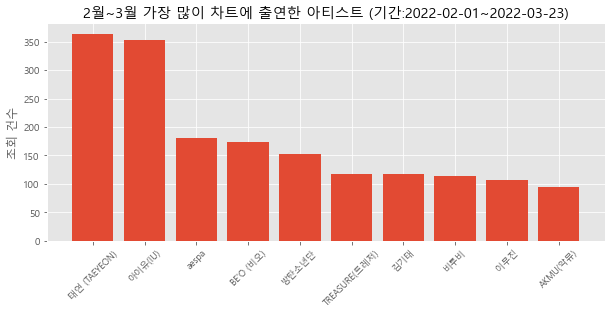

In [69]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')
    
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=45)
plt.bar(dfat_10['아티스트'],dfat_10['곡명'])
plt.title(f'2월~3월 가장 많이 차트에 출연한 아티스트 (기간:{sdt}~{edt})')
plt.ylabel('조회 건수')
plt.show()

#### 가장 많이 나타난 아티스트(태연)의 노래 조회 건수

In [76]:
df_tae=df_bugs[df_bugs['아티스트'] == '태연 (TAEYEON)']
df_tit = df_tae.groupby('곡명')[['아티스트']].count()



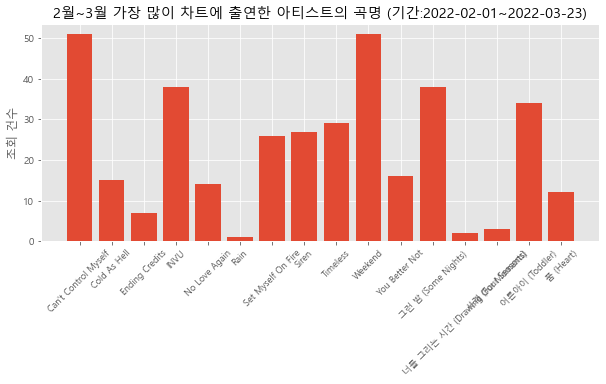

In [78]:
if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')
    
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=45)

plt.bar(df_tit.index, df_tit.아티스트)

plt.title(f'2월~3월 가장 많이 차트에 출연한 아티스트의 곡명 (기간:{sdt}~{edt})')
plt.ylabel('조회 건수')
plt.show()

In [81]:
df_tit

,아티스트
곡명,
Can't Control Myself,51
Cold As Hell,15
Ending Credits,7
INVU,38
No Love Again,14
Rain,1
Set Myself On Fire,26
Siren,27
Timeless,29


C:\Users\l8822\AppData\Local\Temp\ipykernel_24584\3438282361.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(df_tomboy.날짜,df_tomboy.점수, label = 'TOMBOY')


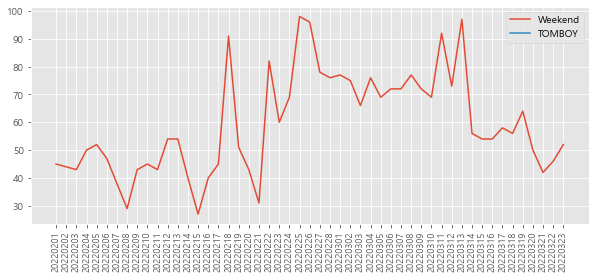

In [91]:
df_weekend=df_bugs[df_bugs['곡명'] == 'Weekend']
df_tomboy=df_bugs[df_bugs['곡명'] == 'Tomboy']

plt.style.use('ggplot')

plt.figure(figsize = (10,4))

plt.xticks(size=9, rotation=90)
plt.plot(df_weekend.날짜,df_weekend.점수, label = 'Weekend')
plt.plot(df_tomboy.날짜,df_tomboy.점수, label = 'TOMBOY')


plt.legend()
plt.show()

### [미션] 1. 아티스트(아이유)의 곡들에 대한 일자별 순위 변화 차트

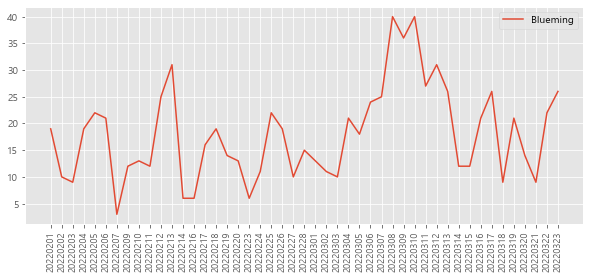

In [101]:
df_iu=df_bugs[df_bugs['아티스트'] == '아이유(IU)']
df_iu_gp = df_iu.groupby('곡명')[['아티스트']].count()


df_blueming = df_bugs[df_bugs['곡명'] == 'Blueming']
plt.style.use('ggplot')
plt.figure(figsize = (10,4))
plt.xticks(size=9, rotation=90)
plt.plot(df_blueming.날짜,df_blueming.점수, label = 'Blueming')
plt.legend()
plt.show()

In [104]:
uniques = df_iu['곡명'].unique()
uniques[1]

'겨울잠'

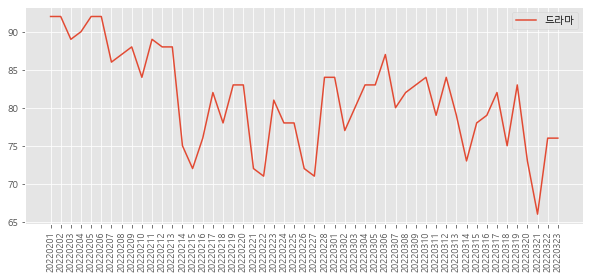

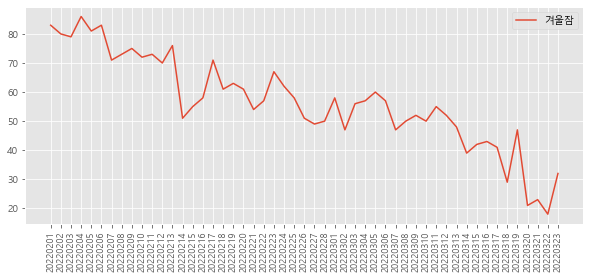

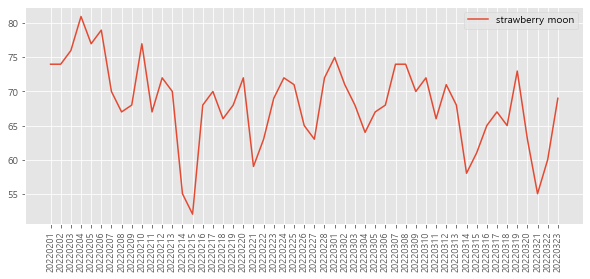

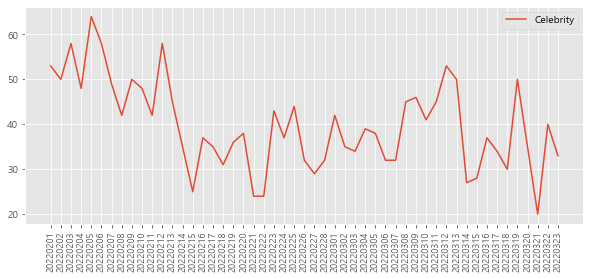

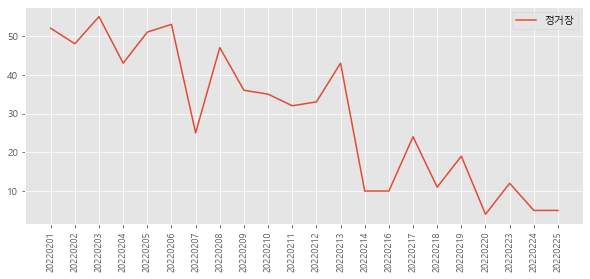

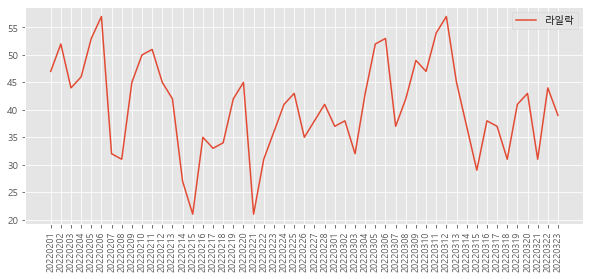

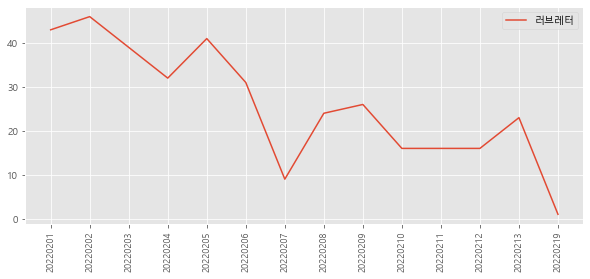

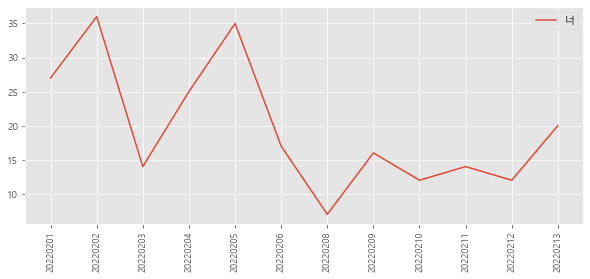

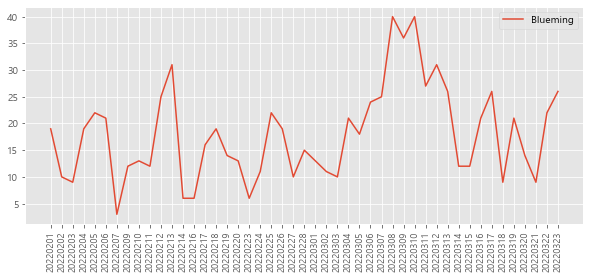

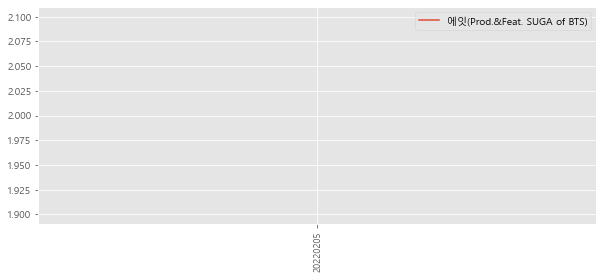

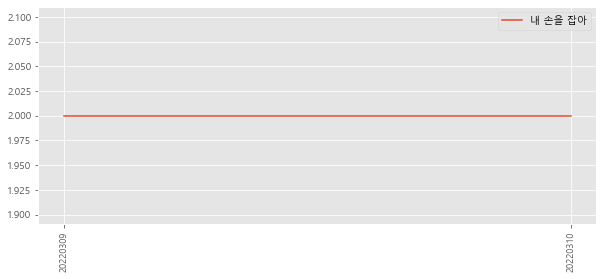

In [108]:
df_iu=df_bugs[df_bugs['아티스트'] == '아이유(IU)']
df_iu_gp = df_iu.groupby('곡명')[['아티스트']].count()

for unique in uniques:     
    song = df_bugs[df_bugs['곡명'] == unique ]
    plt.style.use('ggplot')
    plt.figure(figsize = (10,4))
    plt.xticks(size=9, rotation=90)
    plt.plot(song.날짜,song.점수, label = unique)
    plt.legend()
    plt.show()

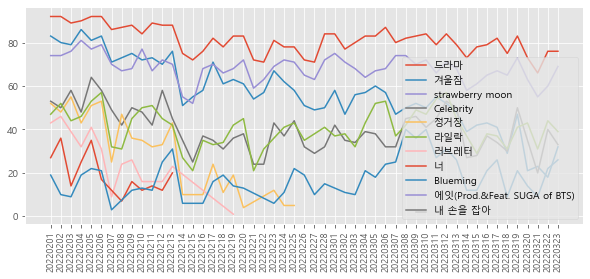

In [109]:

plt.style.use('ggplot')
plt.figure(figsize = (10,4))
plt.xticks(size=9, rotation=90)
for unique in uniques:     
    song = df_bugs[df_bugs['곡명'] == unique ]

    plt.plot(song.날짜,song.점수, label = unique)
plt.legend()
plt.show()

In [111]:
# df_bugs.to_csv('c:/pydata/bugs_20220201_20220323.csv', index = False)